In [3]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython.display import Video
import time
plt.style.use("/Users/tjwilli/jupyter.mplstyle")

In [2]:
def chg_dens(i,j,k,i0,j0,k0,dl,Q=1):
    if (i==i0) and (j==j0) and (k==k0):
        return Q / dl**3
    return 0

In [4]:
L = 4
dl = 0.2
x = y = z = np.arange(-L/2,L/2,dl)
v_old = np.zeros( (x.size,y.size,z.size) )
v_new = np.zeros_like(v_old)
#Boundary conditions
v_old[0,:,:] = 0
v_old[-1,:,:] = 0
v_old[:,0,:] = 0
v_old[:,-1,:] = 0
v_old[:,:,0] = 0
v_old[:,:,-1] = 0

v_new[:,:,:] = v_old[:,:,:]

i0 = j0 = k0 = int(np.ceil((L/2) / dl))

In [5]:
tstart = time.time()
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            for k in range(1,z.size-1):
                v_new[i,j,k] = 1/6 * (
                    v_old[i+1,j,k] + v_new[i-1,j,k] +
                    v_old[i,j+1,k] + v_new[i,j-1,k] + 
                    v_old[i,j,k+1] + v_new[i,j,k-1] + 
                    chg_dens(i,j,k,i0,j0,k0,dl,1) * dl**2
                )
    deltaV = np.mean( np.abs(v_new-v_old) )
    #dV.append(deltaV)
    v_old[:,:,:] = v_new[:,:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

4.8 seconds for 139 iterations


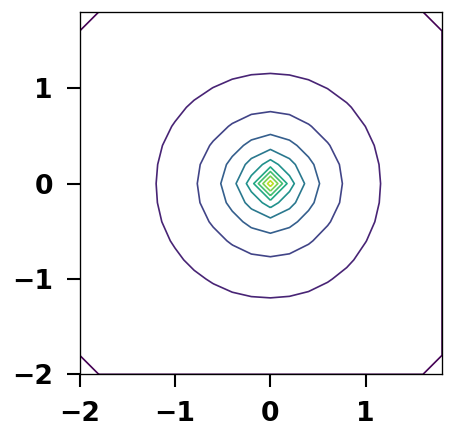

In [6]:
vxy = v_new.sum( (2) )
cs=plt.contour(vxy,extent=[x.min(),x.max(),y.min(),y.max()],levels=10)
#plt.clabel(cs)
plt.gca().set_aspect('equal')

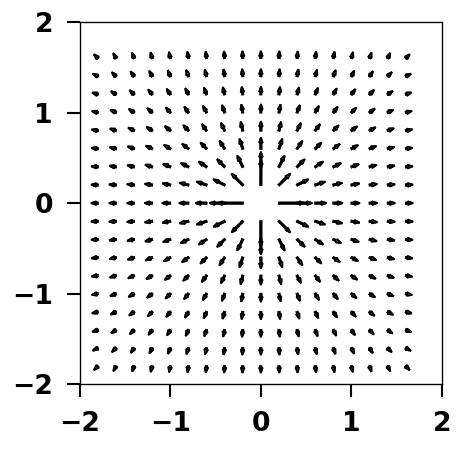

In [8]:
Ex = np.zeros_like(vxy)
Ey = np.zeros_like(vxy)

for i in range(1,x.size-1,1):
    for j in range(1,y.size-1,1):
        if i==i0 and j==j0:
            continue
        Ex[i,j] = -(vxy[i+1,j] - vxy[i-1,j]) / (2*dl)
        Ey[i,j] = -(vxy[i,j+1] - vxy[i,j-1]) / (2*dl)
        mag = np.hypot(Ex[i,j],Ey[i,j])
        scale = 20
        arrow = plt.arrow(x[i],y[j],Ex[i,j]/scale,Ey[i,j]/scale,width=0.013,facecolor='green',edgecolor='k')
        plt.gca().add_artist(arrow)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.gca().set_aspect('equal')

In [ ]:
plt.plot(x[i0+1:],v_new[i0+1:,j0,k0])
plt.plot(x[i0+1:],1/x[i0+1:] / 4 / np.pi)

## Spherical shell

In [9]:
def chg_dens(x,y,R,dl,Q=1):
    lam = Q / (2 * np.pi * R)
    if np.abs( np.linalg.norm( (x,y) ) - R ) <= dl/2:
        return lam / dl**2
    return 0

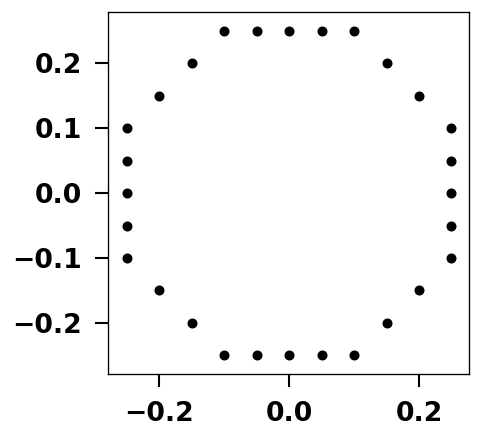

In [10]:
L = 1
dl = 0.05
R = 0.25
x = y = np.arange(-L/2,L/2,dl)

v_old = np.zeros( (x.size,y.size) )
v_new = np.zeros_like(v_old)
#Boundary conditions
v_old[0,:] = 0
v_old[-1,:] = 0
v_old[:,0] = 0
v_old[:,-1] = 0

v_new[:,:] = v_old[:,:]

for i in range(x.size):
    for j in range(y.size):
        q = chg_dens(x[i],y[j],R,dl)
        if q:
            plt.scatter(x[i],y[j],c="0.",cmap='viridis')
plt.gca().set_aspect('equal')

In [12]:
tstart = time.time()
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = 1/4 * (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1] +
                chg_dens(x[i],y[j],R,dl) * dl**2
            )
    deltaV = np.mean( np.abs(v_new-v_old) )
    #dV.append(deltaV)
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

3.2 seconds for 285 iterations


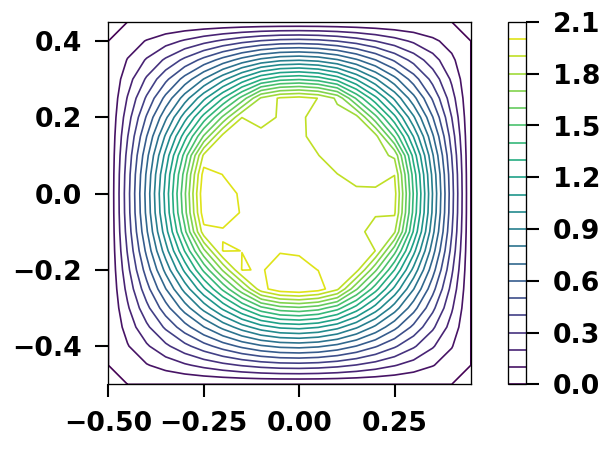

In [13]:
cs=plt.contour(v_new,extent=[x.min(),x.max(),y.min(),y.max()],levels=20)
plt.gca().set_aspect('equal')
plt.colorbar()

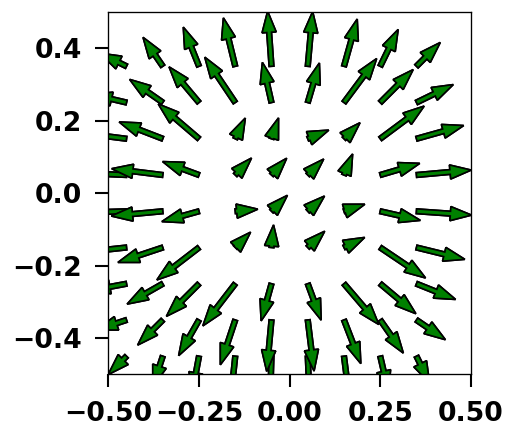

In [14]:
Ex = np.zeros_like(v_new)
Ey = np.zeros_like(v_new)

for i in range(1,x.size-1,2):
    for j in range(1,y.size-1,2):
        Ex[i,j] = -(v_new[i+1,j] - v_new[i-1,j]) / (2*dl)
        Ey[i,j] = -(v_new[i,j+1] - v_new[i,j-1]) / (2*dl)
        mag = np.hypot(Ex[i,j],Ey[i,j])
        scale = 100
        arrow = plt.arrow(x[i],y[j],Ex[i,j]/scale,Ey[i,j]/scale,width=0.013,facecolor='green',edgecolor='k')
        plt.gca().add_artist(arrow)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.gca().set_aspect('equal')

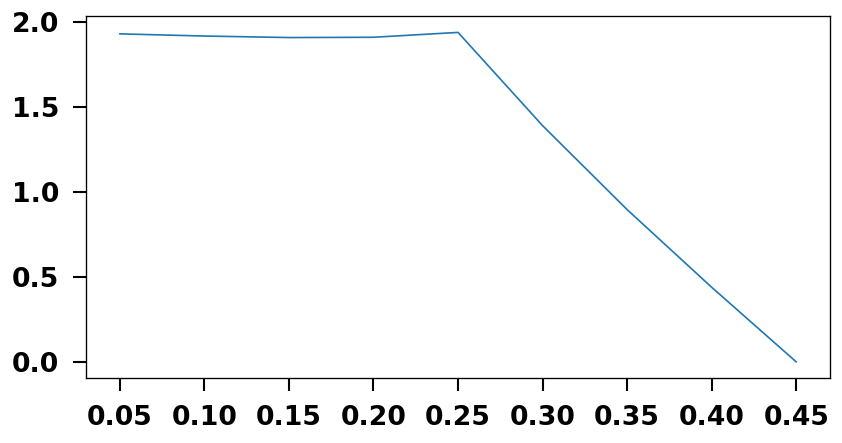

In [15]:
i0=j0=k0 = 10
plt.plot(x[i0+1:],v_new[i0+1:,j0])

## Asymm shell

In [16]:
def chg_dens(x,y,R,dl,Q=1):
    lam = Q / (2 * np.pi * R) * x / np.hypot(x,y) #times cos(phi)
    if np.abs( np.linalg.norm( (x,y) ) - R ) <= dl/2:
        return lam / dl**2
    return 0

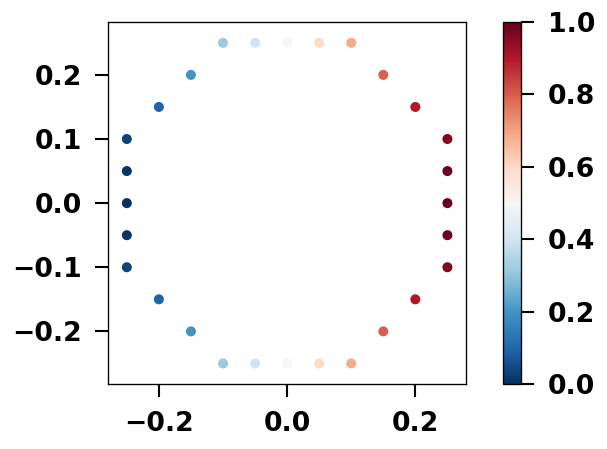

In [17]:
L = 2
dl = 0.05
R = 0.25
x = y = np.arange(-L/2,L/2,dl)

v_old = np.zeros( (x.size,y.size) )
v_new = np.zeros_like(v_old)
#Boundary conditions
v_old[0,:] = 0
v_old[-1,:] = 0
v_old[:,0] = 0
v_old[:,-1] = 0

v_new[:,:] = v_old[:,:]

chdens = []
for i in range(x.size):
    for j in range(y.size):
        q = chg_dens(x[i],y[j],R,dl)
        chdens.append(q)
chdens = np.array(chdens)
color = (chdens - chdens.min())/(chdens.max()-chdens.min())
n = 0
xplot = []
yplot = []
c = []
for i in range(x.size):
    for j in range(y.size):
        q = chdens[n]
        if q:
            xplot.append(x[i])
            yplot.append(y[j])
            c.append(color[n])
        n+=1
c=plt.scatter(xplot,yplot,c=c,cmap='RdBu_r')
plt.gca().set_aspect('equal')
plt.colorbar(c)

In [18]:
tstart = time.time()
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = 1/4 * (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1] +  
                chg_dens(x[i],y[j],R,dl) * dl**2
            )
    deltaV = np.mean( np.abs(v_new-v_old) )
    #dV.append(deltaV)
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

16.6 seconds for 360 iterations


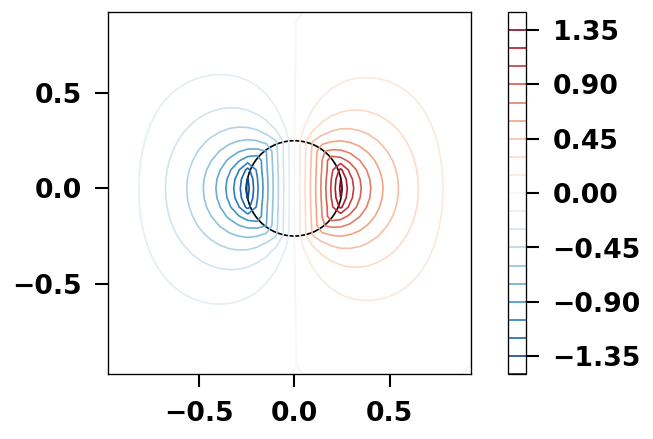

In [19]:
cs=plt.contour(v_new.T,extent=[x.min(),x.max(),y.min(),y.max()],origin='lower',levels=20,cmap='RdBu_r')
circ = plt.Circle(xy=(0,0),radius=R,facecolor='None',edgecolor='k')
plt.gca().add_artist(circ)
plt.gca().set_aspect('equal')
plt.colorbar()

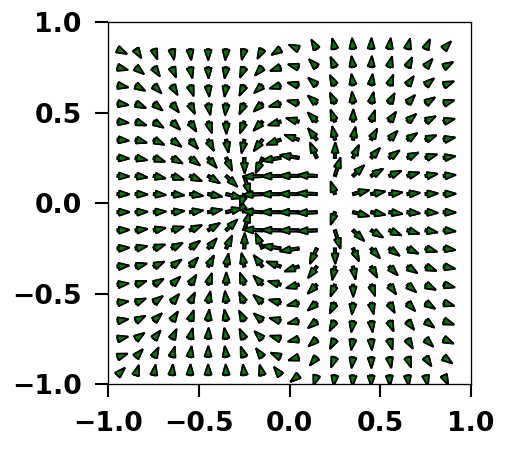

In [20]:
Ex = np.zeros_like(v_new)
Ey = np.zeros_like(v_new)

for i in range(1,x.size-1,2):
    for j in range(1,y.size-1,2):
        Ex[i,j] = -(v_new[i+1,j] - v_new[i-1,j]) / (2*dl)
        Ey[i,j] = -(v_new[i,j+1] - v_new[i,j-1]) / (2*dl)
        mag = np.hypot(Ex[i,j],Ey[i,j])
        scale = 100
        arrow = plt.arrow(x[i],y[j],Ex[i,j]/scale,Ey[i,j]/scale,width=0.013,facecolor='green',edgecolor='k')
        plt.gca().add_artist(arrow)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.gca().set_aspect('equal')

In [21]:
def chg_dens(x,y,R,dl,Q=1):
    phi = np.arctan2(y,x)
    lam = Q / (2 * np.pi * R) * np.cos(2*phi)  #times cos(phi)
    if np.abs( np.linalg.norm( (x,y) ) - R ) <= dl/2:
        return lam / dl**2
    return 0

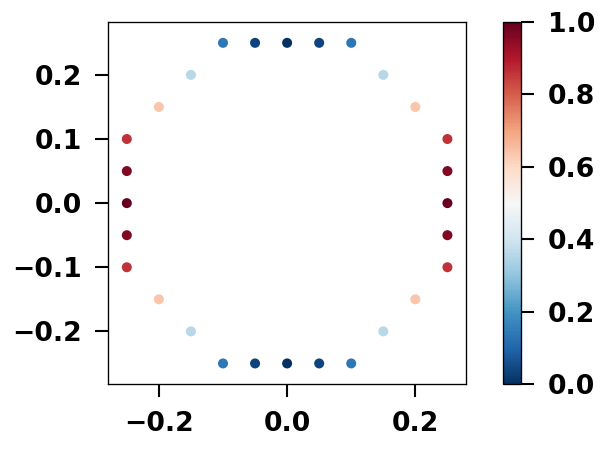

In [22]:
L = 2
dl = 0.05
R = 0.25
x = y = np.arange(-L/2,L/2,dl)

v_old = np.zeros( (x.size,y.size) )
v_new = np.zeros_like(v_old)
#Boundary conditions
v_old[0,:] = 0
v_old[-1,:] = 0
v_old[:,0] = 0
v_old[:,-1] = 0

v_new[:,:] = v_old[:,:]

chdens = []
for i in range(x.size):
    for j in range(y.size):
        q = chg_dens(x[i],y[j],R,dl)
        chdens.append(q)
chdens = np.array(chdens)
color = (chdens - chdens.min())/(chdens.max()-chdens.min())
n = 0
xplot = []
yplot = []
c = []
for i in range(x.size):
    for j in range(y.size):
        q = chdens[n]
        if q:
            xplot.append(x[i])
            yplot.append(y[j])
            c.append(color[n])
        n+=1
c=plt.scatter(xplot,yplot,c=c,cmap='RdBu_r')
plt.gca().set_aspect('equal')
plt.colorbar(c)

In [23]:
tstart = time.time()
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = 1/4 * (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1] + 
                chg_dens(x[i],y[j],R,dl) * dl**2
            )
    deltaV = np.mean( np.abs(v_new-v_old) )
    #dV.append(deltaV)
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

11.9 seconds for 166 iterations


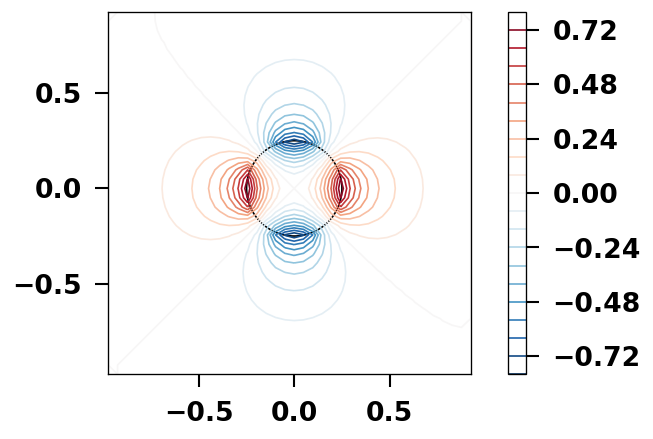

In [24]:
cs=plt.contour(v_new.T,extent=[x.min(),x.max(),y.min(),y.max()],origin='lower',levels=20,cmap='RdBu_r')
circ = plt.Circle(xy=(0,0),radius=R,facecolor='None',edgecolor='k')
plt.gca().add_artist(circ)
plt.gca().set_aspect('equal')
plt.colorbar()

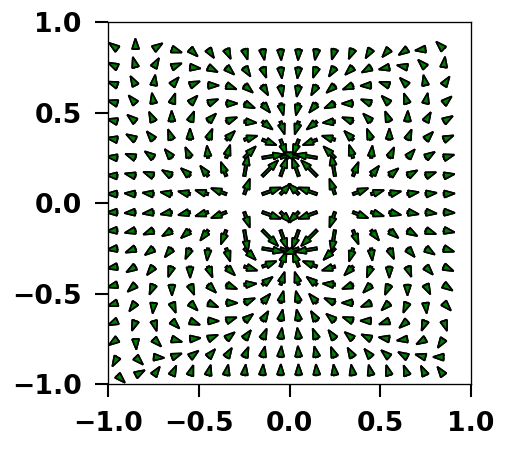

In [25]:
Ex = np.zeros_like(v_new)
Ey = np.zeros_like(v_new)

for i in range(1,x.size-1,2):
    for j in range(1,y.size-1,2):
        Ex[i,j] = -(v_new[i+1,j] - v_new[i-1,j]) / (2*dl)
        Ey[i,j] = -(v_new[i,j+1] - v_new[i,j-1]) / (2*dl)
        mag = np.hypot(Ex[i,j],Ey[i,j])
        scale = 75
        arrow = plt.arrow(x[i],y[j],Ex[i,j]/scale,Ey[i,j]/scale,width=0.013,facecolor='green',edgecolor='k')
        plt.gca().add_artist(arrow)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.gca().set_aspect('equal')

In [26]:
def chg_dens(x,y,R,dl,Q=1):
    phi = np.arctan2(y,x)
    lam = Q / (2 * np.pi * R) * np.cos(4*phi)  #times cos(phi)
    if np.abs( np.linalg.norm( (x,y) ) - R ) <= dl/2:
        return lam / dl**2
    return 0

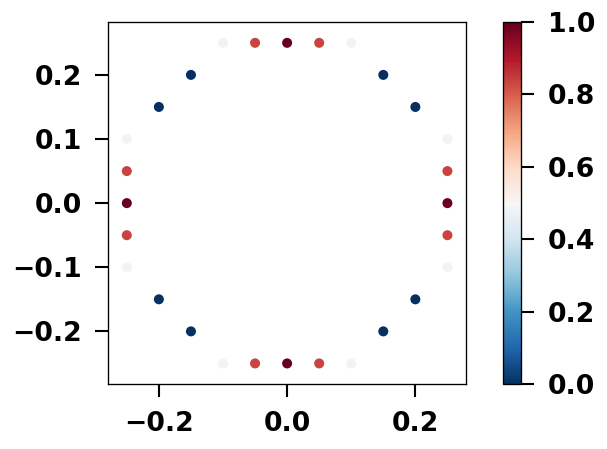

In [30]:
L = 1
dl = 0.05
R = 0.25
x = y = np.arange(-L/2,L/2,dl)

v_old = np.zeros( (x.size,y.size) )
v_new = np.zeros_like(v_old)
#Boundary conditions
v_old[0,:] = 0
v_old[-1,:] = 0
v_old[:,0] = 0
v_old[:,-1] = 0

v_new[:,:] = v_old[:,:]

chdens = []
for i in range(x.size):
    for j in range(y.size):
        q = chg_dens(x[i],y[j],R,dl)
        chdens.append(q)
chdens = np.array(chdens)
color = (chdens - chdens.min())/(chdens.max()-chdens.min())
n = 0
xplot = []
yplot = []
c = []
for i in range(x.size):
    for j in range(y.size):
        q = chdens[n]
        if q:
            xplot.append(x[i])
            yplot.append(y[j])
            c.append(color[n])
        n+=1
c=plt.scatter(xplot,yplot,c=c,cmap='RdBu_r')
plt.gca().set_aspect('equal')
plt.colorbar(c)

In [31]:
tstart = time.time()
deltaV = np.inf
dV = []
n = 0
while deltaV > 1e-5:
    deltaV = 0
    for i in range(1,x.size-1):
        for j in range(1,y.size-1):
            v_new[i,j] = 1/4 * (
                v_old[i+1,j] + v_new[i-1,j] +
                v_old[i,j+1] + v_new[i,j-1] + 
                chg_dens(x[i],y[j],R,dl) * dl**2
            )
    deltaV = np.mean( np.abs(v_new-v_old) )
    #dV.append(deltaV)
    v_old[:,:] = v_new[:,:]
    n+=1
tstop = time.time()
print("{:.1f} seconds for {} iterations".format(tstop-tstart,n))

5.6 seconds for 204 iterations


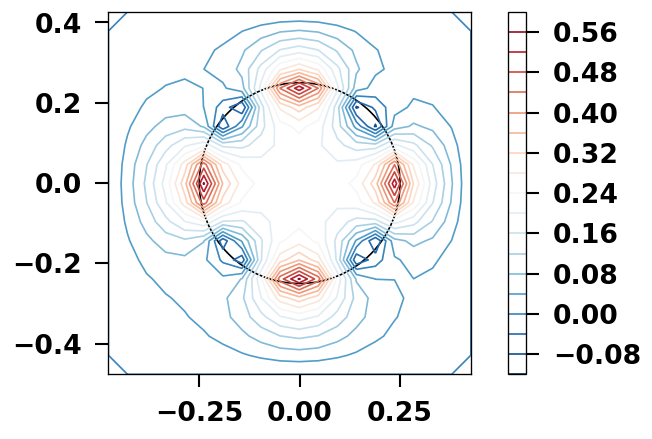

In [32]:
cs=plt.contour(v_new.T,extent=[x.min(),x.max(),y.min(),y.max()],origin='lower',levels=20,cmap='RdBu_r')
circ = plt.Circle(xy=(0,0),radius=R,facecolor='None',edgecolor='k')
plt.gca().add_artist(circ)
plt.gca().set_aspect('equal')
plt.colorbar()

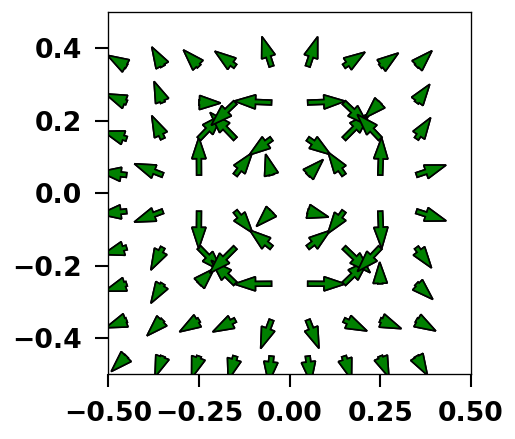

In [33]:
Ex = np.zeros_like(v_new)
Ey = np.zeros_like(v_new)

for i in range(1,x.size-1,2):
    for j in range(1,y.size-1,2):
        Ex[i,j] = -(v_new[i+1,j] - v_new[i-1,j]) / (2*dl)
        Ey[i,j] = -(v_new[i,j+1] - v_new[i,j-1]) / (2*dl)
        mag = np.hypot(Ex[i,j],Ey[i,j])
        scale = 75
        arrow = plt.arrow(x[i],y[j],Ex[i,j]/scale,Ey[i,j]/scale,width=0.013,facecolor='green',edgecolor='k')
        plt.gca().add_artist(arrow)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.gca().set_aspect('equal')